### Importing the text files and converting them into pandas dataframe

In [1]:
import pandas as pd

In [2]:
from collections import defaultdict
from pathlib import Path
import pandas as df

my_dir_path = r"C:\Users\mihir\Desktop\jupyter notebook\files"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df = pd.DataFrame(results)

In [3]:
df['text_len']  = df['text'].str.len()

In [5]:
df['text_len'].mean()

305074.26392961876

In [6]:
df.head(10)

,file_name,text,text_len
0,ABMO72.txt,\n \n\n \n\n \n \n\n \n\nABC Modeling Using S...,277649
1,AML62OV.txt,\n \n\n \n \n\n \n\nSAS® Anti-Money \nLaunder...,79083
2,ATEVA74C.txt,\n \n\n \n\n \n\nSAS® Visual Analytics 7.4: \...,6664
3,BNGDM17.txt,\n \n\n \n\n \n\nAnalytics-Driven \nForecasti...,284951
4,BQBD14.txt,\n \n\n \n\n \n\nQuality by Design (QbD) \nUs...,434942
5,BSPV14.txt,\n \n\n \n\n \n\nStatistics for FDA Process \...,505647
6,CAADP22.txt,\n \n\n \n\n \n\nCustomer Advisory \nAcademy ...,171917
7,CAAVA83.txt,\n \n\n \n\n \n\nCustomer Advisory \nAcademy ...,129632
8,CAAVD83.txt,\n \n\n \n\n \n\nSAS® Visual Data Mining \nan...,332891
9,CAAVS83.txt,\n \n\n \n\n \n\nSAS® Visual Statistics in \n...,402726


In [7]:
df.shape

(341, 3)

### Find topics using str.contains

In [6]:
find_content = df.loc[df['text'].str.contains("greenacre", case=False)]

In [7]:
find_content

,file_name,text,text_len
116,LWDMEX51.txt,\n \n\n \n\n \n\nExtending SAS® Enterprise \n...,348496
166,LWJDIS13.txt,\n \n\n \n\n \n\nJMP® Software: Analyzing \nD...,351415
188,LWMULT42.txt,\n \n\n \n\n \n\nMultivariate Statistics for ...,552873
204,LWPMLR51.txt,\n \n\n \n\n \n\nPredictive Modeling Using \n...,477899


### Getting word count for text

In [8]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
0,\n \n\n \n\n \n \n\n \n\nABC Modeling Using S...,41958
1,\n \n\n \n \n\n \n\nSAS® Anti-Money \nLaunder...,11093
2,\n \n\n \n\n \n\nSAS® Visual Analytics 7.4: \...,991
3,\n \n\n \n\n \n\nAnalytics-Driven \nForecasti...,43352
4,\n \n\n \n\n \n\nQuality by Design (QbD) \nUs...,66787


### Lower case

In [10]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

0    abc modeling using sas® activity-based managem...
1    sas® anti-money laundering: solution orientati...
2    sas® visual analytics 7.4: an introduction to ...
3    analytics-driven forecasting course notes anal...
4    quality by design (qbd) using jmp® software co...
Name: text, dtype: object

In [9]:
df.head()

,file_name,text,text_len,word_count
0,ABMO72.txt,\n \n\n \n\n \n \n\n \n\nABC Modeling Using S...,277649,41958
1,AML62OV.txt,\n \n\n \n \n\n \n\nSAS® Anti-Money \nLaunder...,79083,11093
2,ATEVA74C.txt,\n \n\n \n\n \n\nSAS® Visual Analytics 7.4: \...,6664,991
3,BNGDM17.txt,\n \n\n \n\n \n\nAnalytics-Driven \nForecasti...,284951,43352
4,BQBD14.txt,\n \n\n \n\n \n\nQuality by Design (QbD) \nUs...,434942,66787


In [10]:
df.iloc[0,1]

'\n  \n\n \n\n \n \n\n \n\nABC Modeling Using SAS® \nActivity-Based \n\nManagement 7.x \n\n \n\n \n\nCourse Notes \n\n\n\n  \n\n \n\nABC Modeling Using SAS® Activity-Based Management 7.x Course Notes was developed by Mary Ann \n\nWoolman. Additional contributions were made by Mike Johnson, Maryanne Marriot, and Don Reid. \n\nEditing and production support was provided by the Curriculum Development and Support Department. \n\nSAS and all other SAS Institute Inc. product or service names are registered trademarks or trademarks of \n\nSAS Institute Inc. in the USA and other countries. ® indicates USA registration. Other brand and product \n\nnames are trademarks of their respective companies. \n\nABC Modeling Using SAS® Activity-Based Management 7.x Course Notes \n\nCopyright © 2016 SAS Institute Inc. Cary, NC, USA. All rights reserved. Printed in the United States of \n\nAmerica. No part of this publication may be reproduced, stored in a retrieval system, or transmitted, in \n\nany form 

### Unused characters

In [11]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'].head()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_28808/2449682765.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


0    \n  \n\n \n\n \n \n\n \n\nABC Modeling Using S...
1    \n  \n\n \n \n\n \n\nSAS AntiMoney \nLaunderin...
2    \n  \n\n \n\n \n\nSAS Visual Analytics 74 \nAn...
3    \n  \n\n \n\n \n\nAnalyticsDriven \nForecastin...
4    \n  \n\n \n\n \n\nQuality by Design QbD \nUsin...
Name: text, dtype: object

### Removing stop-words

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0    ABC Modeling Using SAS ActivityBased Managemen...
1    SAS AntiMoney Laundering Solution Orientation ...
2    SAS Visual Analytics 74 An Introduction Custom...
3    AnalyticsDriven Forecasting Course Notes Analy...
4    Quality Design QbD Using JMP Software Course N...
Name: text, dtype: object

In [14]:
df.head()

,file_name,text,text_len,word_count
0,ABMO72.txt,ABC Modeling Using SAS ActivityBased Managemen...,277649,41958
1,AML62OV.txt,SAS AntiMoney Laundering Solution Orientation ...,79083,11093
2,ATEVA74C.txt,SAS Visual Analytics 74 An Introduction Custom...,6664,991
3,BNGDM17.txt,AnalyticsDriven Forecasting Course Notes Analy...,284951,43352
4,BQBD14.txt,Quality Design QbD Using JMP Software Course N...,434942,66787


### Removing number from text

In [18]:
df['text'] = df['text'].str.replace('\d+', '')

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_28808/3593629228.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')


In [19]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df.head()

,file_name,text,text_len,word_count
0,ABMO72.txt,ABC Modeling Using SAS ActivityBased Managemen...,277649,28798
1,AML62OV.txt,SAS AntiMoney Laundering Solution Orientation ...,79083,8398
2,ATEVA74C.txt,SAS Visual Analytics An Introduction Custom C...,6664,726
3,BNGDM17.txt,AnalyticsDriven Forecasting Course Notes Analy...,284951,28165
4,BQBD14.txt,Quality Design QbD Using JMP Software Course N...,434942,45392


In [20]:
df['word_count'].mean()

32765.953079178886

### Getting the frequency of top repeated words in the entire dataset

In [21]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:30]

In [27]:
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})

In [28]:
data = freq_df.set_index('text').to_dict()['count']

In [29]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

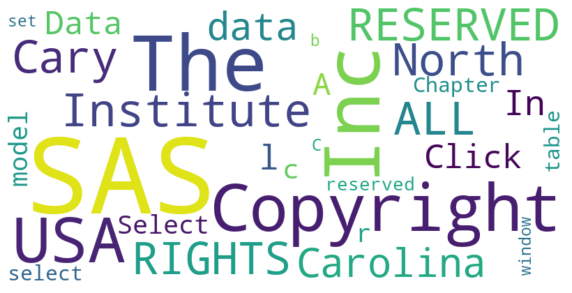

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
find_content = df.loc[df['text'].str.contains("greenacre", case=False)]

In [32]:
find_content

,file_name,text,text_len,word_count
116,LWDMEX51.txt,Extending SAS Enterprise Miner UserWritten Nod...,348496,31099
166,LWJDIS13.txt,JMP Software Analyzing Discrete Responses Cour...,351415,38883
188,LWMULT42.txt,Multivariate Statistics Understanding Complex ...,552873,59238
204,LWPMLR51.txt,Predictive Modeling Using Logistic Regression ...,477899,43696


### Sematic Document search using TF-IDF and Cosine Similarity

In [36]:
list_of_doc = df['text'].to_list()

In [37]:
len(list_of_doc)

341

In [38]:
import re
import string

In [39]:
import re
documents_clean = []
for d in list_of_doc:
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    document_test = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(document_test)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiate a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# It fits the data and transform it as a vector
X = vectorizer.fit_transform(documents_clean)
# Convert the X as transposed matrix
X = X.T.toarray()
# Create a DataFrame and set the vocabulary as the index
df = pd.DataFrame(X, index=vectorizer.get_feature_names())

C:\Users\mihir\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
df.head(50)

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
aa,0.005345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaa,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaa,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaaaaa,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaaaaaa,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaaaaaaa,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaai,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaebeebd,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaai,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001342,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df.shape

(97385, 341)

In [43]:
import numpy as np

In [44]:
def get_similar_articles(q, df):
  print("topic:", q)
  print("Finding Document Using Cosine Similarity: ")
  # Convert the query become a vector
  q = [q]
  q_vec = vectorizer.transform(q).toarray().reshape(df.shape[0],)
  sim = {}
  # Calculate the similarity
  for i in range(10):
    sim[i] = np.dot(df.loc[:, i].values, q_vec) / np.linalg.norm(df.loc[:, i]) * np.linalg.norm(q_vec)
  
  # Sort the values 
  sim_sorted = sorted(sim.items(), key=lambda x: x[1], reverse=True)
  # Print the articles and their similarity values
  for k, v in sim_sorted:
    if v != 0.0:
      print("Cosine Similarity:", v)
      print(list_of_doc[k])
      print()
# Add The Query
q1 = 'logistic regression'
# Call the function
get_similar_articles(q1, df)

topic: logistic regression
Finding Document Using Cosine Similarity: 
Cosine Similarity: 0.21607007250937238
SAS Visual Statistics SAS Viya Interactive Model Building Course Notes SAS Visual Statistics SAS Viya Interactive Model Building Course Notes developed Andy Ravenna Catherine Truxillo Chip Wells Additional contributions made Marjorie Shelley Instructional design editing production support provided Learning Design Development team SAS SAS Institute Inc product service names registered trademarks trademarks SAS Institute Inc USA countries indicates USA registration Other brand product names trademarks respective companies SAS Visual Statistics SAS Viya Interactive Model Building Course Notes Copyright  SAS Institute Inc Cary NC USA All rights reserved Printed United States America No part publication may reproduced stored retrieval system transmitted form means electronic mechanical photocopying otherwise without prior written permission publisher SAS Institute Inc Book code E cou